![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

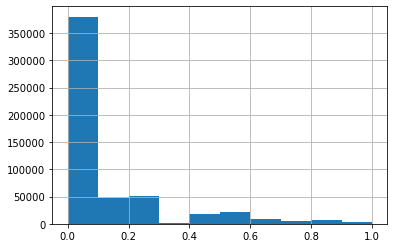

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print(X_train[0])
print(X.shape)

What are you talking about? What group do Peter, Christy, and Dominique belong to? I'm not aware of any. Why are you still hiding behind a pseudonym?
(541462,)


## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

En primer lugar, se realiza el preprocesamiento del corpus convirtiendo los caracteres a minúsculas para estandarizar.

In [9]:
# Celda 1
vect1 = CountVectorizer(lowercase=False,stop_words='english', max_features=100)
Xp1 = vect1.fit_transform(X_train)


In [10]:
Xp1.shape

(362779, 100)

Se utilizaron los parámetros stop_words y max_features para reducir el tamaño de la matriz resultante. Esto debido a 2 razones: En el total de tokens generados hay palabras que como por ejemplo: “and”, “the”, “him”, que se considera que no tienen información para ofrecer contexto sobre si el comentario es o no tóxico, por lo tanto, se eliminan de los tokens. Además, se seleccionan las **primeras 100** palabras con mayor frecuencia dentro del corpus con el objetivo limitar el tiempo de procesamiento del algoritmo propuesto.    

A continuación se entrena un algoritmo de Random Forest para regresión 

In [11]:
from sklearn.ensemble import RandomForestRegressor

modeloRF = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
modeloRF.fit(Xp1, y_train)

predict_RF = modeloRF.predict(vect1.transform(X_test))

MSE_rf1= metrics.mean_squared_error(y_test, predict_RF)

print('\n')
print('El MSE para el modelo de regresión de Random Forest es: ' + str(MSE_rf1))




El MSE para el modelo de regresión de Random Forest es: 0.06188525242137394


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Se realiza un procedimiento similar al del punto 1 y se consideran los trigramas con el parámetro ngram_range

In [12]:
# Celda 2 - Tokenizacion
vec2 = CountVectorizer(lowercase=False, ngram_range=(1, 3), stop_words='english', max_features=100)
Xp2 = vec2.fit_transform(X_train)

Nuevamente, utilizamos los parámetros stop_word y max_features para poder procesar los datos en el Random Forest. Se consideraron trigramas en la tokenización.

In [13]:
Xp2.shape

(362779, 100)

In [14]:
# Implementación de modelo
modeloRF2 = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
modeloRF2.fit(Xp2, y_train)
predict_RF2 = modeloRF2.predict(vec2.transform(X_test))

MSE_rf2= metrics.mean_squared_error(y_test, predict_RF2)
print('\n')
print('El MSE para el modelo de regresión de Random Forest considerando trigramas es: ' + str(MSE_rf2))



El MSE para el modelo de regresión de Random Forest considerando trigramas es: 0.06188525242137394


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

En textos (corpus) largos se encuentran palabras comunes como 'the', 'a', 'is' de forma muy frecuente. Se presume que estas palabras no contienen mucho contexto sobre la oración, sin embargo, son frecuentes y debido a esto puede opacar el impacto de palabras menos frecuentes que ofrecen más contexto, por ejemplo 'philosophy', 'cooking', 'accident'. 

La función TfidfVectorizer tiene como objetivo reducir el impacto de las palabras frecuentes con poco contexto para que aquellas que ofrecen más contexto sean representadas en los modelos. Para conseguir esto, la función **multiplica** la **frecuencia por término** (obtenida de CountVectorizer) por **la frecuencia por documento inversa**.

La frecuencia por documento inversa se obtiene con la siguiente ecuación:

$$idf\left(t\right) = log\left( \frac{1+n}{1+df\left (t\right )} \right ) + 1$$

En donde n es el número total de textos en el corpus y df(t) es el número de documentos que contienen la palabra t. 

Finalmente, la función TfidfVectorizer nos devuelve una matriz normalizada de la forma

$$ TfidfVectorizer\left ( t,d \right ) = CountVectorizer\left ( t,d \right ) * idf\left ( t \right ) $$

Nota: '*' Es un producto cruz.

Si se compara la función de TfidfVectorizer con CountVectorizer una de las principales ventajas de la primera es que CountVectorizer cuenta la frecuencia de las palabras y esto puede generar un sesgo a favor de las palabras con mayor frecuencia e ignora las palabras "raras" que permitirían procesar los datos de mejor manera; mientras que TfidfVectorizer considera el peso total de la palabra en los documentos y penaliza las palabras más frecuentes.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Utilizamos la función descrita anteriormente para realizar la tokenización.

In [15]:
# Celda 4 -  Tokenizacion
vec3 = TfidfVectorizer(lowercase=False, stop_words='english', max_features=100)
Xp3 = vec3.fit_transform(X_train)

In [16]:
Xp3.shape

(362779, 100)

In [17]:
# Implementación de modelo
modeloRF3 = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
modeloRF3.fit(Xp3, y_train)
predict_RF3 = modeloRF3.predict(vec3.transform(X_test))

MSE_rf3= metrics.mean_squared_error(y_test, predict_RF3)
print('\n')
print('El MSE para el modelo de regresión de Random Forest usando la funcion TfidfVectorizer: ' + str(MSE_rf3))



El MSE para el modelo de regresión de Random Forest usando la funcion TfidfVectorizer: 0.05798969272237578


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

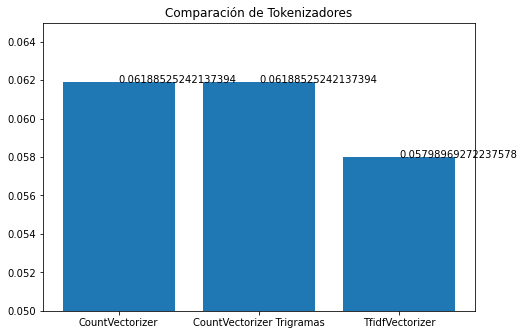

In [18]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Tokenizadores")
ejeX = ['CountVectorizer','CountVectorizer Trigramas' ,'TfidfVectorizer']
ejeY = [MSE_rf1,MSE_rf2,MSE_rf3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0.05)
plt.show()

A partir de la métrica MSE podemos determinar que los diferentes tokenizadores tienen un desempeño similar, sin embargo vemos que el tokenizador TfidfVectorizer ofrece un mejor desempeño que los CountVectorizer. Esto puede ser debido a las palabras que tienen mucha ocurrencia pero poco contexto dentro del corpus. 